In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns=["Sepal Length (cm)","Sepal Width (cm)", "Petal Length (cm)","Petal Width (cm)","Category"]

In [5]:
iris_dataset = pd.read_csv(r'C:\Users\Sarthak Mahale\Downloads\iris.csv',names = columns)

In [6]:
iris_dataset.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_dataset.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Category             0
dtype: int64

In [8]:
iris_dataset.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Category           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris_dataset['Category'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Category, dtype: int64

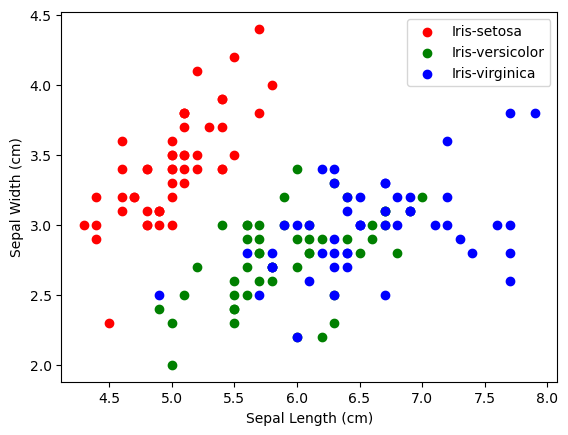

In [14]:
color=["red","green","blue"]
categories=["Iris-setosa","Iris-versicolor","Iris-virginica"]
#Usinf for loop to iterate through the dataset
for i in range(3):
    x=iris_dataset[iris_dataset['Category']==categories[i]]
    plt.scatter(x['Sepal Length (cm)'],x['Sepal Width (cm)'],c=color[i],label=categories[i])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
X = iris_dataset.drop('Category',axis = 1)
Y = iris_dataset['Category']

In [18]:
print(X)
print(Y)

     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-set

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


In [21]:
svm = SVC()

In [22]:
svm.fit(X_train,Y_train)

SVC()

In [23]:
X_training_prediction = svm.predict(X_train)
X_training_accuracy = accuracy_score(Y_train,X_training_prediction)
print(X_training_accuracy)

0.975


In [24]:
X_testing_prediction = svm.predict(X_test)
X_testing_accuracy = accuracy_score(Y_test,X_testing_prediction)
print(X_testing_accuracy)

0.9666666666666667


In [25]:
X_new = np.array([[5.4,3.7,1.5,0.2], [  6.3,3.4,5.6,2.4 ], [  5.6,2.6,3.5,1.0]])
#Prediction of the species from the input vector
prediction = svm.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
